In [1]:
import os
# CHANGE: remove logger/logging

import numpy as np
from tqdm import trange
import tensorflow as tf

from utils import *
from network import Network
from statistic import Statistic

import network
import statistic
import ops
import utils

# network 
# CHANGE: replaced flags with variables
model = "pixel_cnn"
batch_size = 100
hidden_dims = 16
recurrent_length = 7
out_hidden_dims = 32
out_recurrent_length = 2
use_residual = False

# training
max_epoch = 50 #100000
test_step = 100
save_step = 1000
learning_rate = 1e-3
grad_clip = 1
use_gpu = True

# data
data = "mnist"
data_dir = "data"
sample_dir = "samples"

# Debug
is_train = True 
display = False
log_level = "INFO"
random_seed = 123

# random seed
tf.set_random_seed(random_seed)
np.random.seed(random_seed)

def main(_):
    model_dir = "model"
    
    DATA_DIR = os.path.join(data_dir, data)
    SAMPLE_DIR = os.path.join(sample_dir, data, model_dir)

    check_and_create_dir(DATA_DIR)
    #check_and_create_dir(SAMPLE_DIR)
    SAMPLE_DIR = 'sample'

    # 0. prepare datasets
    if data == "mnist":
        from tensorflow.examples.tutorials.mnist import input_data
        mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

        next_train_batch = lambda x: mnist.train.next_batch(x)[0]
        next_test_batch = lambda x: mnist.test.next_batch(x)[0]

        height, width, channel = 28, 28, 1

        train_step_per_epoch = int(mnist.train.num_examples / batch_size)
        test_step_per_epoch = int(mnist.test.num_examples / batch_size)
    elif data == "cifar":
        from cifar10 import IMAGE_SIZE, inputs

        maybe_download_and_extract(DATA_DIR)
        images, labels = inputs(eval_data=False,
            data_dir=os.path.join(DATA_DIR, 'cifar-10-batches-bin'), batch_size=batch_size)

        height, width, channel = IMAGE_SIZE, IMAGE_SIZE, 3

    with tf.Session() as sess:
        network = Network(sess, height, width, channel)

        stat = Statistic(sess, data, model_dir, tf.trainable_variables(), test_step)
        stat.load_model()

        if is_train:
            print("Training starts!")

            initial_step = stat.get_t() if stat else 0
            iterator = trange(max_epoch, ncols=70, initial=initial_step)

            for epoch in iterator:
                # 1. train
                total_train_costs = []
                for idx in range(train_step_per_epoch):
                    images = binarize(next_train_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=True)
                    total_train_costs.append(cost)

                # 2. test
                total_test_costs = []
                for idx in range(test_step_per_epoch):
                    images = binarize(next_test_batch(batch_size)).reshape([batch_size, height, width, channel])

                    cost = network.test(images, with_update=False)
                    total_test_costs.append(cost)

                avg_train_cost, avg_test_cost = np.mean(total_train_costs), np.mean(total_test_costs)

                stat.on_step(avg_train_cost, avg_test_cost)
                print("Epoch: {}".format(epoch))
                print("train l: {}, test l: {}".format(avg_train_cost, avg_test_cost))
                print()
                
            iterator.set_description("train l: %.3f, test l: %.3f" % (avg_train_cost, avg_test_cost))

            # 3. generate samples
            samples = network.generate()
            save_images(samples, height, width, 10, 10,
                directory=SAMPLE_DIR, prefix="epoch_%s" % epoch)

        else:
            print("Image generation starts!")

            samples = network.generate()
            save_images(samples, height, width, 10, 10, directory=SAMPLE_DIR)
            
        print('Errors:')
        print(avg_train_cost)
        print(avg_test_cost)

if __name__ == "__main__":
    tf.app.run()

Skip creating directory: data\mnist
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\mnist\t10k-images-idx3-ubyte.gz
Extracting data\mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Building pixel_cnn starts!
Building conv_inputs
[conv2d_a] conv_inputs : Placeholder:0 (?, 28, 28, 1) -> conv_inputs/outputs_plus_b:0 (?, 28, 28, 16)
[conv2d_b] CONV0 : conv_inputs/outputs_plus_b:0 (?, 28, 28, 16) -> CONV0/outputs_plus_b:0 (?, 28, 28, 3)
Building C

  2%|▊                                         | 1/50 [00:00<?, ?it/s]

Saving checkpoints...
Epoch: 0
train l: 0.24605496227741241, test l: 0.13751590251922607



  4%|█▏                             | 2/50 [02:10<1:44:41, 130.87s/it]

Saving checkpoints...
Epoch: 1
train l: 0.13720448315143585, test l: 0.13724683225154877



  6%|█▊                             | 3/50 [04:15<1:41:05, 129.05s/it]

Saving checkpoints...
Epoch: 2
train l: 0.1365453600883484, test l: 0.13562853634357452



  8%|██▍                            | 4/50 [06:21<1:38:05, 127.95s/it]

Saving checkpoints...
Epoch: 3
train l: 0.13613757491111755, test l: 0.1356244683265686



 10%|███                            | 5/50 [08:24<1:35:00, 126.68s/it]

Saving checkpoints...
Epoch: 4
train l: 0.13572151958942413, test l: 0.13565725088119507



 12%|███▋                           | 6/50 [10:51<1:37:18, 132.70s/it]

Saving checkpoints...
Epoch: 5
train l: 0.1353251338005066, test l: 0.13435082137584686



 14%|████▎                          | 7/50 [13:27<1:40:01, 139.57s/it]

Saving checkpoints...
Epoch: 6
train l: 0.135013148188591, test l: 0.13500544428825378



 16%|████▉                          | 8/50 [16:00<1:40:34, 143.67s/it]

Saving checkpoints...
Epoch: 7
train l: 0.13462430238723755, test l: 0.13368146121501923



 18%|█████▌                         | 9/50 [18:33<1:40:06, 146.50s/it]

Saving checkpoints...
Epoch: 8
train l: 0.1343553215265274, test l: 0.1336456537246704



 20%|██████                        | 10/50 [23:08<2:03:23, 185.08s/it]

Saving checkpoints...
Epoch: 9
train l: 0.13414210081100464, test l: 0.1330556422472



 22%|██████▌                       | 11/50 [25:43<1:54:28, 176.10s/it]

Saving checkpoints...
Epoch: 10
train l: 0.1340470016002655, test l: 0.13352327048778534



 24%|███████▏                      | 12/50 [28:17<1:47:20, 169.48s/it]

Saving checkpoints...
Epoch: 11
train l: 0.13391567766666412, test l: 0.1328164041042328



 26%|███████▊                      | 13/50 [31:00<1:43:17, 167.50s/it]

Saving checkpoints...
Epoch: 12
train l: 0.13378024101257324, test l: 0.1330333799123764



 28%|████████▍                     | 14/50 [33:36<1:38:22, 163.96s/it]

Saving checkpoints...
Epoch: 13
train l: 0.13375551998615265, test l: 0.13277201354503632



 30%|█████████                     | 15/50 [36:23<1:36:08, 164.82s/it]

Saving checkpoints...
Epoch: 14
train l: 0.1336555927991867, test l: 0.13301503658294678



 32%|█████████▌                    | 16/50 [38:54<1:31:02, 160.65s/it]

Saving checkpoints...
Epoch: 15
train l: 0.1336013525724411, test l: 0.13400420546531677



 34%|██████████▏                   | 17/50 [41:40<1:29:20, 162.43s/it]

Saving checkpoints...
Epoch: 16
train l: 0.13360364735126495, test l: 0.13316503167152405



 36%|██████████▊                   | 18/50 [45:09<1:34:03, 176.36s/it]

Saving checkpoints...
Epoch: 17
train l: 0.13359662890434265, test l: 0.1324576586484909



 38%|███████████▍                  | 19/50 [48:17<1:32:57, 179.93s/it]

Saving checkpoints...
Epoch: 18
train l: 0.13349081575870514, test l: 0.13256293535232544



 40%|████████████                  | 20/50 [51:56<1:35:44, 191.49s/it]

Saving checkpoints...
Epoch: 19
train l: 0.13346029818058014, test l: 0.13306891918182373



 42%|████████████▌                 | 21/50 [55:25<1:35:09, 196.88s/it]

Saving checkpoints...
Epoch: 20
train l: 0.13339351117610931, test l: 0.13233691453933716



 44%|█████████████▏                | 22/50 [58:53<1:33:21, 200.04s/it]

Saving checkpoints...
Epoch: 21
train l: 0.13342663645744324, test l: 0.13263799250125885



 46%|████████████▉               | 23/50 [1:02:20<1:30:57, 202.13s/it]

Saving checkpoints...
Epoch: 22
train l: 0.13331356644630432, test l: 0.13226664066314697



 48%|█████████████▍              | 24/50 [1:05:44<1:27:55, 202.91s/it]

Saving checkpoints...
Epoch: 23
train l: 0.13333041965961456, test l: 0.13297809660434723



 50%|██████████████              | 25/50 [1:09:14<1:25:26, 205.07s/it]

Saving checkpoints...
Epoch: 24
train l: 0.1333276927471161, test l: 0.1324387788772583



 52%|██████████████▌             | 26/50 [1:12:35<1:21:27, 203.65s/it]

Saving checkpoints...
Epoch: 25
train l: 0.13332553207874298, test l: 0.1322643756866455



 54%|███████████████             | 27/50 [1:15:51<1:17:15, 201.56s/it]

Saving checkpoints...
Epoch: 26
train l: 0.13324187695980072, test l: 0.13372784852981567



 56%|███████████████▋            | 28/50 [1:19:04<1:12:53, 198.78s/it]

Saving checkpoints...
Epoch: 27
train l: 0.1332942545413971, test l: 0.13228580355644226



 58%|████████████████▏           | 29/50 [1:22:17<1:09:02, 197.25s/it]

Saving checkpoints...
Epoch: 28
train l: 0.13323001563549042, test l: 0.13224899768829346



 60%|████████████████▊           | 30/50 [1:25:36<1:05:52, 197.62s/it]

Saving checkpoints...
Epoch: 29
train l: 0.1333010345697403, test l: 0.1326654553413391



 62%|█████████████████▎          | 31/50 [1:28:51<1:02:21, 196.94s/it]

Saving checkpoints...
Epoch: 30
train l: 0.13326437771320343, test l: 0.1323050856590271



 64%|███████████████████▏          | 32/50 [1:32:10<59:14, 197.47s/it]

Saving checkpoints...
Epoch: 31
train l: 0.1332249641418457, test l: 0.1332075595855713



 66%|███████████████████▊          | 33/50 [1:35:28<55:59, 197.64s/it]

Saving checkpoints...
Epoch: 32
train l: 0.13320469856262207, test l: 0.13247069716453552



 68%|████████████████████▍         | 34/50 [1:38:48<52:55, 198.47s/it]

Saving checkpoints...
Epoch: 33
train l: 0.1331661492586136, test l: 0.13256895542144775



 70%|█████████████████████         | 35/50 [1:42:06<49:34, 198.28s/it]

Saving checkpoints...
Epoch: 34
train l: 0.13314370810985565, test l: 0.13241930305957794



 72%|█████████████████████▌        | 36/50 [1:45:24<46:12, 198.07s/it]

Saving checkpoints...
Epoch: 35
train l: 0.13312095403671265, test l: 0.13304497301578522



 74%|██████████████████████▏       | 37/50 [1:48:39<42:43, 197.16s/it]

Saving checkpoints...
Epoch: 36
train l: 0.13313663005828857, test l: 0.13239020109176636



 76%|██████████████████████▊       | 38/50 [1:51:57<39:30, 197.55s/it]

Saving checkpoints...
Epoch: 37
train l: 0.13308535516262054, test l: 0.1328936219215393



 78%|███████████████████████▍      | 39/50 [1:55:13<36:06, 196.98s/it]

Saving checkpoints...
Epoch: 38
train l: 0.13309639692306519, test l: 0.1331167072057724



 80%|████████████████████████      | 40/50 [1:58:30<32:48, 196.89s/it]

Saving checkpoints...
Epoch: 39
train l: 0.13304206728935242, test l: 0.13231536746025085



 82%|████████████████████████▌     | 41/50 [2:00:49<26:57, 179.72s/it]

Saving checkpoints...
Epoch: 40
train l: 0.13310347497463226, test l: 0.13275370001792908



 84%|█████████████████████████▏    | 42/50 [2:03:14<22:33, 169.21s/it]

Saving checkpoints...
Epoch: 41
train l: 0.13306356966495514, test l: 0.1323421448469162



 86%|█████████████████████████▊    | 43/50 [2:05:47<19:10, 164.34s/it]

Saving checkpoints...
Epoch: 42
train l: 0.1330186277627945, test l: 0.13244043290615082



 88%|██████████████████████████▍   | 44/50 [2:08:18<16:01, 160.29s/it]

Saving checkpoints...
Epoch: 43
train l: 0.13307428359985352, test l: 0.13282164931297302



 90%|███████████████████████████   | 45/50 [2:10:47<13:04, 156.95s/it]

Saving checkpoints...
Epoch: 44
train l: 0.13307270407676697, test l: 0.13217896223068237



 92%|███████████████████████████▌  | 46/50 [2:13:17<10:19, 154.97s/it]

Saving checkpoints...
Epoch: 45
train l: 0.133034810423851, test l: 0.13308286666870117



 94%|████████████████████████████▏ | 47/50 [2:15:46<07:39, 153.15s/it]

Saving checkpoints...
Epoch: 46
train l: 0.1330339014530182, test l: 0.1321239024400711



 96%|████████████████████████████▊ | 48/50 [2:18:17<05:05, 152.54s/it]

Saving checkpoints...
Epoch: 47
train l: 0.13304530084133148, test l: 0.13216844201087952



 98%|█████████████████████████████▍| 49/50 [2:20:50<02:32, 152.49s/it]

Saving checkpoints...
Epoch: 48
train l: 0.13297995924949646, test l: 0.13284295797348022



100%|██████████████████████████████| 50/50 [2:23:21<00:00, 152.24s/it]

Saving checkpoints...
Epoch: 49
train l: 0.1329963058233261, test l: 0.1322878897190094



51it [2:25:59, 153.87s/it]                                            


============== ( 0,  0) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
   #                        
                            
                            
                            
                            
    #                       
                            
                            
                            
                            
                            
                          # 
                            
                            
                            
                            
============== ( 0,  1) ==============
                            
                            
                            
                       

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 0, 10) ==============
                            
                            
                            
                            
                            
                            
                 #          
                         #  
      #                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                    #       
                            
============== ( 0, 20) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
============== ( 1,  1) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                      #     
                            
              #             
                            
                            
                            
                            
                            
============== ( 1,  2) =========

                            
                            
                            
                            
                            
                            
                            
                            
                            
              #             
                            
                            
                            
                            
                            
============== ( 1, 11) ==============
                            
                            
            #               
                            
                            
                            
                            
                  #         
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                        #   
                            
                            
            #               
                            
                            
                            
              #             
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 1, 21) ==============
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
============== ( 2,  2) ==============
                            
                            
                            
                            
                            
                            
              #             
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                         #  
                            
                            
                            
       #                    
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
      #                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 2, 12) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
============== ( 2, 21) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
          #                 
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                        #   
============== ( 2, 22) ==============
                            
                            
                       

                            
                            
                    #       
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 3,  3) ==============
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    #                       
                            
                            
                            
                            
                            
                            
                            
 #                          
                            
                            
    

                            
       #                    
                   #        
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
              #             
#                           
                            
             #              
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 3, 25) ==============
                            
                            
                            
                            
#                           
                            
                            
    

                            
      #                     
                            
                            
                            
                            
                            
                            
============== ( 4,  6) ==============
                            
                            
                            
                            
                 #          
                            
                            
                            
                   #        
                            
                            
                            
                            
                            
                     #      
                            
                            
              #             
                            
                            
                            
                            
                            
                            
                            
    

                            
      #       #             
     #                      
                            
                            
                            
       #                    
                            
                            
                            
                            
                       #    
      #                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 5,  7) ==============
                            
            #               
                            
                            
                            
      ##                    
   # ##                     
                            
                            
    

                            
                            
           #                
                            
                            
                            
============== ( 5, 16) ==============
                            
                            
                            
                  #         
                            
         #                  
    ####                    
    #                       
      #                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
     #                      
                            
                            
                            
                            
                            
       #                    
    

                            
    #                       
                       #    
                            
                            
       #                    
                            
                            
                            
                            
                            
                            
                            
                            
           #                
                            
                            
============== ( 5, 26) ==============
                            
                            
                            
                            
                            
        ##                  
    #####                   
          #                 
                            
                            
                            
                            
                            
                            
                            
                            
    

                        #   
                            ============== ( 6, 17) ==============
                            
                            
                            
                            
                            
      ####                  
    #####                   
  ###                       
                            
                            
                            
   #                        
                            
                            
                            
 #                          
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 6, 18) ==============
 #                          
                        

                            
                            
                            
                   #        
                            
                            
                            
                            
                            
                            
                            
  #                         
                            
============== ( 6, 27) ==============
                            
                            
                            
                            
           #                
       ##                   
    #####                   
  ###                       
                            
                            
                            
                #           
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== ( 8,  8) ==============
                            
                            
                        #   
                            
                            
        ##                  
   #######                  
    # ##                    
 ## #####                   
  #                         
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
      # ##                  
    ######                  
  # ### ##                  
  #  ######                 
   #####                    
                            
                #           
                            
                            
                            
                            
               #            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
 #                          
============== ( 8, 18) ==============
                            
                            
                            
                            
                            
      #  #                  
    #####                   
 ## ####                    
  # ### ##                  
    

                            
                            
                            
                            
                            
                            
============== (10,  5) ==============
                            
    #                       
                            
                            
                            
      ####                  
    #####                   
  #######         #       # 
    ####                    
   #  #                     
                            
                            
                            
                  #         
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
              #             
                            
    

                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (11, 17) ==============
                            
                            
                            
                            
                            
      # #                   
    ##### #                 
 #  ## #                    
   ######                   
        #                   
                            
                            
                            
                            
                            
                            
                            
                            
    

                            
                            
                            
       ##                   
    #####                   
  #######                   
 #### ##                    
   ##  #                    
          #                 
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (11, 27) ==============
                            
                            
                            
                            
                            
      ### #                 
    ######                  
  # 

                            
                            
============== (13,  8) ==============
                            
                            
                            
                            
                            
       # #                  
    ######                  
  ######                    
   ######                   
    #                       
   #                        
                            
                            
                            
                            
                      #     
                            
                            
                            
                            
                            
   #                        
                            
                            
                            
                            
                            
                            
============== (13,  9) ==============
                            
                       

                            
                            
                            
                            
                            
               #            
                            
                            
                            
         #                  
                            
                            
                            
============== (13, 18) ==============
                #           
                            
                            
                            
                            
      ###                   
   #######                  
  #  ###                    
    #####                   
   # #                      
                            
                            
                            
                            
                            
                            
                            
           #                
                            
                            
    

                            
                            
                            
============== (14, 26) ==============
                            
                            
                            
                            
                            
      #  #                  
    #####             #     
   #####                    
   ######                   
       ##                   
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
         #                  
                            
                            
============== (14, 27) ==============
                       

                     #   #  
                            
    ###                     
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (15,  8) ==============
                            

                 #          
                            
============== (16,  8) ==============
                       #    
                            
                            
                            
                            
         #                  
    #####                   
   ## ##                    
   #####                    
  ####                      
                            
                            
                            
                            
                      

============== (16, 17) ==============
         #                  
                            
                            
                            
   #                        
      ###                   
    ######                  
  ######                    
   ######                   
     #                      
                            
                          # 
                            
                            
                            
        #  ##               
   # ### #####              
  #  ##    ##               
                            
     #                      
           #                
                            
                            
                            
                            
                            
                            
                            
============== (16, 18) ==============
                            
                            
                      #     
                       

   ######                   
   ### ##        #          
    ##                      
                            
                            
                            
                            
                            
      ## #####              
     ####### #              
   ##########               
  ###  ######               
                            
                            
                            
                            
                            
                            
                            
                            
                            
============== (18,  0) ==============
                            
                            
       #                    
                            
                            
       ##                   
   #######                  
   ##### #                  
   ##### #                  
   ####                     
                            
                            
    

                            
                            
                            
============== (18,  9) ==============
                            
                            
                            
                            
                            
      ## #                  
   #######                  
  ########                  
  #######                   
        #                   
                            
                            
                            
                            
                            
      #  ## #               
     ##### ## #             
   ##########               
##  ##  #   #               
                            
                            
                            
                            
                            
                            
                            
                        #   
                            
============== (18, 10) ==============
                       

                            
                            
   #                        
                            
                            
        ##                  
    #####                   
   ######  #                
  #  ###                    
  #####                     
                            
                            
                            
                            
                            
      #  # ##               
   ##########               
   #########                
 #  ##   ###                
  ###                       
  ##                        
                            
              #             
                            
                            
                            
                            
                            
============== (19, 21) ==============
                            
                            
                            
             #       #      
                            
    

  ### ##   ##               
                            
  #                         
                            
                            
                            
                            
                            
                            
                            
============== (20,  2) ==============
              #             
                            
                            
                            
                            
      #  #                  
    ### ##                  
 # ######                   
   ######                   
   ## ##                    
                            
                            
                            
============== (21,  4) ==============
                            
                            
                            
                 #          
                            
        # #                 
    ####                    
   #####                    
    ####               

                            
                            
                            
                            
                            
                            
============== (21, 13) ==============
                            
                            
                            
                            
                            
      ####                  
    #####  #                
   ##### #                  
   ## ##                    
    # #      #              
                            
    #                       
                            
  #                         
                            
      #   ####              
   # #######                
   ### #### #               
 ## ## #   #                
   ##    #                  
 # #                        
                            
                            
                            
                           #
                            
                            
    

                            
============== (22, 27) ==============
                            
                            
                            
                            
                            
      ## #                  
    #####                   
    #####                   
   ## ####                  
     ##                     
                            
                            
                            
                            
                            
      ## # ##               
  #  ########               
   #### #### #           #  
 # ###  #  #                
                            
 ##                         
                            
                            
 #                          
                       #    
                            
                            
                            
============== (23,  0) ==============
                            
                            
                       

     ####### #              
   ##########               
  #####  # #            #   
  ##                        
   #              #         
                            
                            
                            
                            
                            
                            
                            
============== (23,  9) ==============
                            
                            
                            
                            
                            
      ###                   
    ######                  
  ###                       
  ##### #                   
  #                         
                            
                            
                            
           #                
                            
         ## #               
    ######## #              
  ####### ###               
  # ## #   #                
   ##                       
  #                         
    

                         #  
                            
                            
      ## ####               
     ####### #              
    ## ##   #               
   ### # # ##               
   ##                       
 ##                         
                            
                            
            #             # 
                            
                            
                            
                            
============== (24, 20) ==============
                            
                            
                            
                            
                            
      ## #                  
    ###                     
  ######                    
   ### #                    
   ##   #                   
                            
                            
                            
      #                     
                            
       #   #                
   # ###### # #             
   #

                            
                            
                            
                     #     #
       ###                  
    ###  #                  
  #######                   
   ######                   
   # #  #                   
                            
                            
                            
                            
                            
      ## ####               
    ######## ##             
   ###########              
 #####   #    #             
   ##                       
  #                         
                            
                            
                            
                            
                    ##      
               #            
                            
============== (25,  2) ==============
                            
============== (26,  3) ==============
                            
                            
                            
                       

   ##########               
 ## ##     #                
   #                        
  ##                        
    #                       
                       #    
                            
                      #     
                    ###     
      #        #     ###    
                            
============== (26, 12) ==============
                            
                            
      #                     
                            
                            
      ###                   
   #######                  
  #######                   
 # ######                   
  ### ##                    
                            
                            
                            
                            
                            
            #               
   # ##### ###              
  ########## #              
   ####    #                
   ##                       
  ##                        
                            
    

                            
                            
       ##                   
    #######                 
    #####                   
 #  ####                    
                            
                            
                            
            #               
                            
                            
       #   #                
    #### ### #              
   ### ######               
   ### # # #                
   ##                       
  #                         
  #                         
                            
           #                
                            
                   # ###    
                    ####    
                      #     
============== (27, 23) ==============
                            
                            
                            
                            
                            
         ##                 
    ### ##                  
  ######                    
    

SystemExit: 

C:\Users\alyci\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [41]:
# pixelcnn, 50 epochs
train_err = [0.24605496227741241, 0.13720448315143585, \
             0.1365453600883484, 0.13613757491111755, \
             0.13572151958942413, 0.1353251338005066, \
             0.135013148188591, 0.13462430238723755, \
             0.1343553215265274, 0.13414210081100464, \
             0.1340470016002655, 0.13391567766666412, \
             0.13378024101257324, 0.13375551998615265, \
             0.1336555927991867, 0.1336013525724411, \
             0.13360364735126495, 0.13359662890434265, \
             0.13349081575870514, 0.13346029818058014, \
             0.13339351117610931, 0.13342663645744324, \
             0.13331356644630432, 0.13333041965961456, \
             0.1333276927471161, 0.13332553207874298, \
             0.13324187695980072, 0.1332942545413971, \
             0.13323001563549042, 0.1333010345697403, \
             0.13326437771320343, 0.1332249641418457, 
             0.13320469856262207, 0.1331661492586136, \
             0.13314370810985565, 0.13312095403671265, \
             0.13313663005828857, 0.13308535516262054, \
             0.13309639692306519, 0.13304206728935242, \
             0.13310347497463226, 0.13306356966495514, 
             0.1330186277627945, 0.13307428359985352, \
             0.13307270407676697, 0.133034810423851, \
             0.1330339014530182, 0.13304530084133148, \
             0.13297995924949646, 0.1329963058233261]

In [42]:
# pixelcnn, 50 epochs
test_err = [0.13751590251922607, 0.13724683225154877, \
            0.13562853634357452, 0.1356244683265686, \
            0.13565725088119507, 0.13435082137584686, \
            0.13500544428825378, 0.13368146121501923, \
            0.1336456537246704, 0.1330556422472,\
            0.13352327048778534, 0.1328164041042328, \
            0.1330333799123764, 0.13277201354503632, \
            0.13301503658294678, 0.13400420546531677, \
            0.13316503167152405, 0.1324576586484909, \
            0.13256293535232544, 0.13306891918182373, \
            0.13233691453933716, 0.13263799250125885, \
            0.13226664066314697, 0.13297809660434723, \
            0.1324387788772583, 0.1322643756866455, \
            0.13372784852981567, 0.13228580355644226, \
            0.13224899768829346, 0.1326654553413391, \
            0.1323050856590271, 0.1332075595855713, 
            0.13247069716453552, 0.13256895542144775, \
            0.13241930305957794, 0.13304497301578522, \
            0.13239020109176636, 0.1328936219215393, \
            0.1331167072057724, 0.13231536746025085, \
            0.13275370001792908, 0.1323421448469162, 
            0.13244043290615082, 0.13282164931297302,\
            0.13217896223068237, 0.13308286666870117, \
            0.1321239024400711, 0.13216844201087952, \
            0.13284295797348022, 0.1322878897190094]

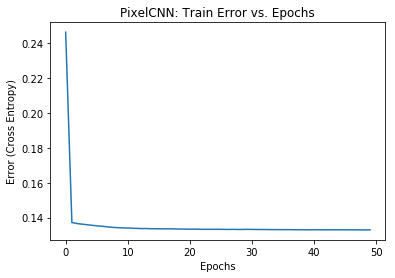

In [44]:
from matplotlib import pyplot as plt

x = np.array([i for i in range(50)])
y1 = np.array(train_err)

_ = plt.plot(x, y1)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Train Error vs. Epochs")
_ = plt.savefig("pixelcnn[1]_50epochs_train_err")
_ = plt.show()


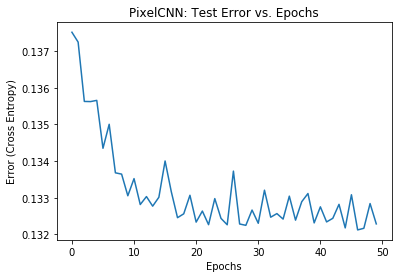

In [45]:
y2 = np.array(test_err)

_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Test Error vs. Epochs")
_ = plt.savefig("pixelcnn[1]_50epochs_train_err")
_ = plt.show()


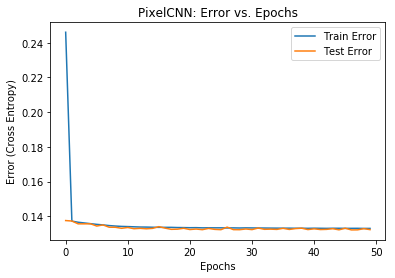

In [46]:
_ = plt.plot(x, y1)
_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Error vs. Epochs")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.savefig("pixelcnn[1]_50epochs_errs")
_ = plt.show()

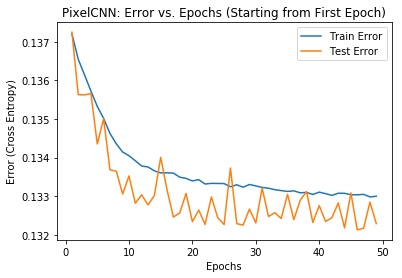

In [47]:
_ = plt.plot(x[1:], y1[1:])
_ = plt.plot(x[1:], y2[1:])
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelCNN: Error vs. Epochs (Starting from First Epoch)")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.savefig("pixelcnn[1]_50epochs_errs1")
_ = plt.show()

# PixelRNN (30 epochs)
Run on Colab

In [48]:
rnn_train_err = [0.33173471689224243, 0.2706405222415924, \
                 0.26856547594070435, 0.2672751247882843, \
                 0.26637789607048035, 0.2656841278076172, \
                 0.2653653621673584, 0.26494771242141724, \
                 0.26459965109825134, 0.26446565985679626, \
                 0.2643096446990967, 0.26410093903541565, \
                 0.26406511664390564, 0.26395508646965027, \
                 0.2638961970806122, 0.26377028226852417, \
                 0.2637140154838562, 0.26363253593444824, \
                 0.26364585757255554, 0.26362985372543335, \
                 0.2635285258293152, 0.2634545862674713, \
                 0.26345521211624146, 0.26345980167388916, \
                 0.26338160037994385, 0.26338672637939453, \
                 0.2633686661720276, 0.26338306069374084, \
                 0.26334333419799805, 0.26338595151901245]

In [49]:
rnn_test_err = [0.26983755826950073, 0.2678973078727722, \
                0.2721490263938904, 0.2657012641429901, \
                0.2675149440765381, 0.26663628220558167, \
                0.26623988151550293, 0.2671581208705902, \
                0.26454776525497437, 0.2660485506057739, \
                0.2635952830314636, 0.2630610764026642, \
                0.2630372941493988, 0.26368436217308044, \
                0.2637206017971039, 0.26339274644851685, \
                0.263009637594223, 0.2633385956287384, \
                0.2630334794521332, 0.262796014547348, \
                0.2626510560512543, 0.2628699839115143, \
                0.2627430558204651, 0.2628183662891388, \
                0.26300930976867676, 0.26286861300468445, \
                0.26275765895843506,  0.26291176676750183,\
                0.26294758915901184,  0.2625179588794708]

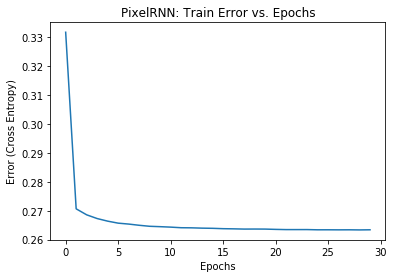

In [50]:
x = np.array([i for i in range(30)])
y1 = np.array(rnn_train_err)

_ = plt.plot(x, y1)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelRNN: Train Error vs. Epochs")
_ = plt.savefig("pixelrnn_30epochs_train_err")
_ = plt.show()

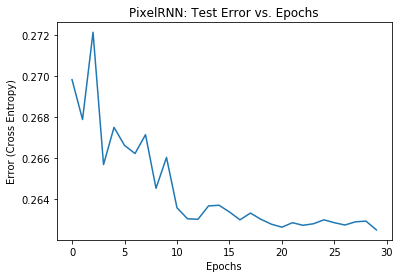

In [51]:
y2 = np.array(rnn_test_err)

_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelRNN: Test Error vs. Epochs")
_ = plt.savefig("pixelrnn_30epochs_test_err")
_ = plt.show()

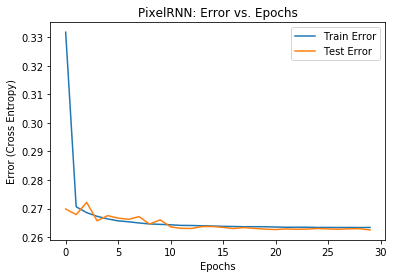

In [52]:
_ = plt.plot(x, y1)
_ = plt.plot(x, y2)
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelRNN: Error vs. Epochs")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.savefig("pixelrnn_30epochs_errs")
_ = plt.show()

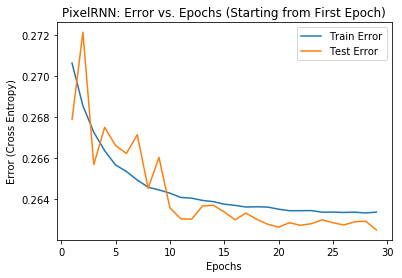

In [53]:
_ = plt.plot(x[1:], y1[1:])
_ = plt.plot(x[1:], y2[1:])
_ = plt.xlabel("Epochs")
_ = plt.ylabel("Error (Cross Entropy)")
_ = plt.title("PixelRNN: Error vs. Epochs (Starting from First Epoch)")
_ = plt.legend(['Train Error', 'Test Error'], loc='upper right')
_ = plt.savefig("pixelrnn_30epochs_errs1")
_ = plt.show()